# Softmax regression

In this exercise you will train a softmax regression model to recognize handwritten digits.
  
The general setup is as follows:
* we are given a set of pairs $(x, y)$, where $x \in R^D$ is a vector of real numbers representing the features, and $y \in \{1,...,c\}$ is the target (in our case we have ten classes, so $c=10$),
* for a given $x$ we model the probability of $y=j$ by $$h(x)_j=p_j = \frac{e^{w_j^Tx}}{\sum_{i=1}^c e^{w_i^Tx}},$$
* to find the right $w$ we will optimize the so called multiclass log loss:
$$L(y,p) = \log{p_y},$$
$$J(w) = -\frac{1}{n}\sum_{i=1}^n L(y_i,h(x)),$$
* with the loss function in hand we can improve our guesses iteratively:
    * $w_{ij}^{t+1} = w_{ij}^t - \text{step_size} \cdot \frac{\partial J(w)}{\partial w_{ij}}$,
* we can end the process after some predefined number of epochs (or when the changes are no longer meaningful).

Let's start with importing the MNIST dataset. For convenience, let's use Google's script from TensorFlow tutorial.

In [4]:
!wget -O MNIST_data.zip https://www.dropbox.com/sh/z7h50270eckbrd3/AAAmBulcP1UaEYBYyvBKqXSwa?dl=1
!unzip MNIST_data.zip -d MNIST_data/

--2017-03-15 14:33:33--  https://www.dropbox.com/sh/z7h50270eckbrd3/AAAmBulcP1UaEYBYyvBKqXSwa?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 

162.125.66.1
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.1|:443... 

connected.


HTTP request sent, awaiting response... 

302 Found
Location: https://dl.dropboxusercontent.com/content_link_zip/bEJQVIppjHiLChCWI7O2ZN0vKgWw7jm4Y2fWBFVvnpvfjbAD0bAVlQDg5205KkGs/file [following]
--2017-03-15 14:33:34--  https://dl.dropboxusercontent.com/content_link_zip/bEJQVIppjHiLChCWI7O2ZN0vKgWw7jm4Y2fWBFVvnpvfjbAD0bAVlQDg5205KkGs/file
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.66.6
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.66.6|:443... 

connected.


HTTP request sent, awaiting response... 

200 OK
Length: unspecified [application/zip]
Saving to: ‘MNIST_data.zip’

MNIST_data.zip          [<=>                 ]       0  --.-KB/s               

MNIST_data.zip          [ <=>                ] 135,26K   559KB/s               

MNIST_data.zip          [  <=>               ] 439,25K   993KB/s               

MNIST_data.zip          [   <=>              ] 679,24K  1,03MB/s               

MNIST_data.zip          [    <=>             ] 831,26K   927KB/s               

MNIST_data.zip          [     <=>            ] 935,22K   828KB/s               

MNIST_data.zip          [      <=>           ] 983,22K   705KB/s               

MNIST_data.zip          [       <=>          ]   1,01M   642KB/s               

MNIST_data.zip          [        <=>         ]   1,05M   591KB/s               

MNIST_data.zip          [         <=>        ]   1,09M   548KB/s               

MNIST_data.zip          [          <=>       ]   1,18M   537KB/s               

MNIST_data.zip          [           <=>      ]   1,27M   523KB/s               

MNIST_data.zip          [            <=>     ]   1,33M   492KB/s               

MNIST_data.zip          [             <=>    ]   1,40M   464KB/s               

MNIST_data.zip          [              <=>   ]   1,44M   442KB/s               

MNIST_data.zip          [               <=>  ]   1,49M   428KB/s               

MNIST_data.zip          [                <=> ]   1,57M   425KB/s               

MNIST_data.zip          [                 <=>]   1,63M   408KB/s               

MNIST_data.zip          [                <=> ]   1,66M   346KB/s               

MNIST_data.zip          [               <=>  ]   1,68M   295KB/s               

MNIST_data.zip          [              <=>   ]   1,71M   228KB/s               

MNIST_data.zip          [             <=>    ]   1,74M   205KB/s               

MNIST_data.zip          [            <=>     ]   1,77M   193KB/s               

MNIST_data.zip          [           <=>      ]   1,82M   187KB/s               

MNIST_data.zip          [          <=>       ]   1,88M   194KB/s               

MNIST_data.zip          [         <=>        ]   1,98M   203KB/s               

MNIST_data.zip          [        <=>         ]   2,10M   222KB/s               

MNIST_data.zip          [       <=>          ]   2,26M   238KB/s               

MNIST_data.zip          [      <=>           ]   2,40M   248KB/s               

MNIST_data.zip          [     <=>            ]   2,52M   267KB/s               

MNIST_data.zip          [    <=>             ]   2,71M   297KB/s               

MNIST_data.zip          [   <=>              ]   2,93M   348KB/s               

MNIST_data.zip          [  <=>               ]   3,10M   376KB/s               

MNIST_data.zip          [ <=>                ]   3,16M   369KB/s               

MNIST_data.zip          [<=>                 ]   3,26M   383KB/s               

MNIST_data.zip          [ <=>                ]   3,32M   409KB/s               

MNIST_data.zip          [  <=>               ]   3,38M   463KB/s               

MNIST_data.zip          [   <=>              ]   3,48M   487KB/s               

MNIST_data.zip          [    <=>             ]   3,52M   496KB/s               

MNIST_data.zip          [     <=>            ]   3,60M   518KB/s               

MNIST_data.zip          [      <=>           ]   3,69M   523KB/s               

MNIST_data.zip          [       <=>          ]   3,83M   537KB/s               

MNIST_data.zip          [        <=>         ]   4,01M   551KB/s               

MNIST_data.zip          [         <=>        ]   4,21M   558KB/s               

MNIST_data.zip          [          <=>       ]   4,41M   582KB/s               

MNIST_data.zip          [           <=>      ]   4,57M   578KB/s               

MNIST_data.zip          [            <=>     ]   4,73M   569KB/s               

MNIST_data.zip          [             <=>    ]   4,82M   536KB/s               

MNIST_data.zip          [              <=>   ]   4,88M   516KB/s               

MNIST_data.zip          [               <=>  ]   4,93M   497KB/s               

MNIST_data.zip          [                <=> ]   4,99M   495KB/s               

MNIST_data.zip          [                 <=>]   5,08M   508KB/s               

MNIST_data.zip          [                <=> ]   5,16M   501KB/s               

MNIST_data.zip          [               <=>  ]   5,30M   520KB/s               

MNIST_data.zip          [              <=>   ]   5,46M   557KB/s               

MNIST_data.zip          [             <=>    ]   5,60M   572KB/s               

MNIST_data.zip          [            <=>     ]   5,73M   574KB/s               

MNIST_data.zip          [           <=>      ]   5,83M   558KB/s               

MNIST_data.zip          [          <=>       ]   5,96M   530KB/s               

MNIST_data.zip          [         <=>        ]   6,05M   498KB/s               

MNIST_data.zip          [        <=>         ]   6,10M   462KB/s               

MNIST_data.zip          [       <=>          ]   6,18M   453KB/s               

MNIST_data.zip          [      <=>           ]   6,29M   446KB/s               

MNIST_data.zip          [     <=>            ]   6,46M   471KB/s               

MNIST_data.zip          [    <=>             ]   6,65M   505KB/s               

MNIST_data.zip          [   <=>              ]   6,83M   564KB/s               

MNIST_data.zip          [  <=>               ]   7,01M   587KB/s               

MNIST_data.zip          [ <=>                ]   7,07M   588KB/s               

MNIST_data.zip          [<=>                 ]   7,16M   579KB/s               

MNIST_data.zip          [ <=>                ]   7,27M   567KB/s               

MNIST_data.zip          [  <=>               ]   7,41M   564KB/s               

MNIST_data.zip          [   <=>              ]   7,57M   578KB/s               

MNIST_data.zip          [    <=>             ]   7,77M   602KB/s               

MNIST_data.zip          [     <=>            ]   8,01M   638KB/s               

MNIST_data.zip          [      <=>           ]   8,29M   695KB/s               

MNIST_data.zip          [       <=>          ]   8,55M   775KB/s               

MNIST_data.zip          [        <=>         ]   8,66M   763KB/s               

MNIST_data.zip          [         <=>        ]   8,73M   730KB/s               

MNIST_data.zip          [          <=>       ]   8,77M   691KB/s               

MNIST_data.zip          [           <=>      ]   8,82M   650KB/s               

MNIST_data.zip          [            <=>     ]   8,88M   617KB/s               

MNIST_data.zip          [             <=>    ]   8,98M   592KB/s               

MNIST_data.zip          [              <=>   ]   9,07M   609KB/s               

MNIST_data.zip          [               <=>  ]   9,16M   607KB/s               

MNIST_data.zip          [                <=> ]   9,27M   605KB/s               

MNIST_data.zip          [                 <=>]   9,44M   612KB/s               

MNIST_data.zip          [                <=> ]   9,58M   606KB/s               

MNIST_data.zip          [               <=>  ]   9,77M   613KB/s               

MNIST_data.zip          [              <=>   ]   9,96M   585KB/s               

MNIST_data.zip          [             <=>    ]  10,04M   540KB/s               

MNIST_data.zip          [            <=>     ]  10,12M   472KB/s               

MNIST_data.zip          [           <=>      ]  10,21M   465KB/s               

MNIST_data.zip          [          <=>       ]  10,33M   487KB/s               

MNIST_data.zip          [         <=>        ]  10,49M   517KB/s               

MNIST_data.zip          [        <=>         ]  10,63M   565KB/s               

MNIST_data.zip          [       <=>          ]  10,77M   585KB/s               

MNIST_data.zip          [      <=>           ]  10,87M   582KB/s               

MNIST_data.zip          [     <=>            ]  10,94M   570KB/s               

MNIST_data.zip          [    <=>             ]  10,99M   544KB/s               

MNIST_data.zip          [   <=>              ]  11,01M   510KB/s               

MNIST_data.zip          [  <=>               ]  11,04M   458KB/s               

MNIST_data.zip          [ <=>                ]  11,06M   450KB/s    in 24s     

2017-03-15 14:33:58 (479 KB/s) - ‘MNIST_data.zip’ saved [11598947]



Archive:  MNIST_data.zip
mapname:  conversion of  failed
replace MNIST_data/t10k-images-idx3-ubyte.gz? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

^C


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# needs tensorflow 1.0

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

train = mnist.train.next_batch(1000)
test = mnist.train.next_batch(1000)

Extracting MNIST_data/train-images-idx3-ubyte.gz


Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Let's take a look at the data. Both train and test are tuples with two numpy array. In the first array you'll find the images (encoded as pixel intensities) and in the second one you'll find the labels (one-hot encoded).

In [2]:
X = train[0]
y = train[1]

X_test = test[0]
y_test = test[1]

In [3]:
# We will store the weights in a D x c matrix, where D is the number of features, and c is the number of classes
#weights = (...) # TODO: Fill in, be sure to have the right shape!
weights = np.zeros([X.shape[1], 10])


def softmax(z):
    # z is cases x outs
    up = np.exp(z)
    down = np.sum(up, axis=1).reshape(-1, 1)
    return up / down

def almost_equal(a, b):
    return a - b < 1e9

almost_equal(softmax(np.log(np.array([[1, 2], [3, 4]]))),
             np.array([[1./3, 2./3], [3./7, 4./7]]))


def predict(weights, X):
    return softmax(np.matmul(X, weights))

def compute_loss_and_gradients(weights, X, y, l2_reg):
    p = predict(weights, X)
    masked_loss = -np.log(p) * y
    assert sum((masked_loss != 0.).flatten()) == X.shape[0]
    loss_per_example = np.sum(masked_loss, axis=1)
    loss = np.average(loss_per_example) + l2_reg * np.sum(weights ** 2)
    
    # p shape [example x class prob]
    # y shape [example x class exp. prob]
    # X shape [example x features]
    grad = np.matmul((p - y).T,X).T / X.shape[0] + l2_reg * 2 * weights
    
    return loss, grad

In [4]:
def conf_matrix(pred_class, real_class, class_no):
    print 'Row represents real classes - similar to P(y|yreal=row)'
    for real_cl in range(class_no):
        row = []
        for pred_cl in range(class_no):
            cnt = 0
            for p, r in zip(pred_class, real_class):
                if p == pred_cl and r == real_cl:
                    cnt += 1
            row.append(cnt)
        
        print real_cl,
        row = np.array(row)
        for v in row * 1000 / np.sum(row):
            print '%03d' % int(v),
        print ''
        
def check_on_set(X, y, weights):
    p = predict(weights, X)
    pred_class, real_class = np.argmax(p, axis=1), np.argmax(y, axis=1)
    print 'Accuracy:', np.average(pred_class == real_class)
    conf_matrix(pred_class, real_class, 10)
    
check_on_set(X, y, weights)
check_on_set(X_test, y_test, weights)

Accuracy: 0.113
Row represents real classes - similar to P(y|yreal=row)
0 1000 000 000 000 000 000 000 000 000 000 
1 1000 000 000 000 000 000 000 000 000 000 
2 1000 000 000 000 000 000 000 000 000 000 
3 1000 000 000 000 000 000 000 000 000 000 
4 1000 000 000 000 000 000 000 000 000 000 
5 1000 000 000 000 000 000 000 000 000 000 
6 1000 000 000 000 000 000 000 000 000 000 
7 1000 000 000 000 000 000 000 000 000 000 
8 1000 000 000 000 000 000 000 000 000 000 
9 1000 000 000 000 000 000 000 000 000 000 
Accuracy: 0.099
Row represents real classes - similar to P(y|yreal=row)
0 1000 000 000 000 000 000 000 000 000 000 
1 1000 000 000 000 000 000 000 000 000 000 
2 1000 000 000 000 000 000 000 000 000 000 
3 1000 000 000 000 000 000 000 000 000 000 
4 1000 000 000 000 000 000 000 000 000 000 
5 1000 000 000 000 000 000 000 000 000 000 
6 1000 000 000 000 000 000 000 000 000 000 
7 1000 000 000 000 000 000 000 000 000 000 
8 1000 000 000 000 000 000 000 000 000 000 
9 1000 000 000 000 0

We can also visualize the weights learned by our algorithm. Try to anticipate the result before executing the cell below.

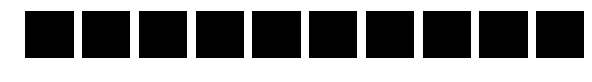

In [5]:
def plot_w(weights):
    fig, subplots = plt.subplots(1, 10)
    fig.set_size_inches(10, 10)

    for i, s in enumerate(subplots.flatten()):
        s.imshow(np.reshape(np.array(weights[:, i]), [28, 28]), cmap='gray')
        s.axis('off')
        
plot_w(weights)

Note that we only used a small portion of the data to develop the model. Now, implement the training on full data. 
Make sure to leverage the `mnist.train.next_batch(...)` method. Also, validate your model properly and find a good value for `l2_reg` hyperparameter. Try to experiment with `batch_size`.

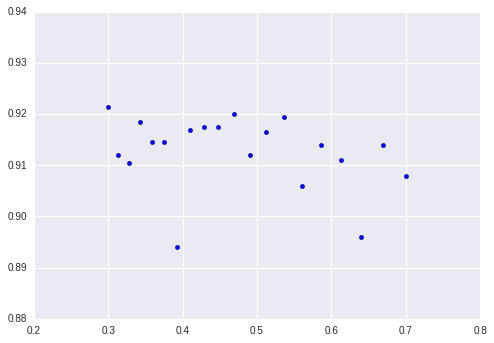

In [7]:
X_val, y_val = mnist.validation.next_batch(2000)

def train_mnist(l2_reg = 0.0, n_epochs = 300, lr = 0.45, batch_sz = 50):
    weights = np.zeros([28**2, 10])
    losses = []
    for i in range(n_epochs):
        batch = mnist.train.next_batch(batch_sz)
        loss, grad = compute_loss_and_gradients(weights, batch[0], batch[1], l2_reg)
        losses.append(loss)
        
        weights -= lr * grad
        
    p = predict(weights, X_val)
    pred_class, real_class = np.argmax(p, axis=1), np.argmax(y_val, axis=1)
    return weights, np.average(pred_class == real_class)
 
par_val, accs = [], []
for par in np.exp(np.linspace(np.log(0.3), np.log(0.7), 2)):
    par_val.append(par)
    weights, acc = train_mnist(lr=par)
    accs.append(acc)
plt.scatter(par_val, accs)

In [52]:
weights, val_acc = train_mnist()
print 'valacc', val_acc
X_test, y_test = mnist.test.next_batch(10000)
check_on_set(X_test, y_test, weights)

valacc 0.922
Accuracy: 0.9004
Row represents real classes - similar to P(y|yreal=row)
0 976 000 005 003 000 000 009 001 005 000 
1 000 969 002 004 000 000 003 001 017 000 
2 007 001 878 015 015 002 011 018 045 001 
3 003 000 021 908 000 019 003 016 021 001 


4 002 004 006 002 939 000 012 003 012 018 
5 016 003 008 062 012 803 016 015 052 006 
6 008 003 007 002 013 007 951 002 004 000 
7 003 011 031 004 006 000 000 930 002 007 
8 009 007 012 032 008 019 012 021 875 001 
9 011 006 010 020 077 009 000 094 014 753 
